In [8]:
import glob

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import weather


In [67]:
files = glob.glob("weather_results/*.csv")
len(files)

105

In [68]:
files_092017 = [f for f in files if "-09-" in f]
dfs = [pd.read_csv(f, names=["dt", "mean"], header=None, skiprows=[0]) for f in files_092017]
dfs = [df for df in dfs if len(df) > 0]

2017-09-01 :  0.0002874979089938053
2017-09-02 :  0.0031065010834832353
2017-09-03 :  0.0002474967123448824
2017-09-04 :  0.00040847513912735503
2017-09-06 :  0.0005039421402522334
2017-09-06 :  0.004665635803295313
2017-09-09 :  0.00024449581763823843
2017-09-10 :  0.0003826613171798928
2017-09-12 :  0.00012452601623278825
2017-09-13 :  0.0035997481641800015
2017-09-14 :  0.00033464197061928953
2017-09-15 :  0.00015837497429405884
2017-09-16 :  0.000971010833990398
2017-09-17 :  0.0014305065323478227
2017-09-18 :  0.0013915092812383989
2017-09-19 :  0.0008313267137408306
2017-09-20 :  0.00012197226475393971
2017-09-21 :  0.00013529800536484968
2017-09-22 :  0.00016247330431548687
2017-09-23 :  0.00023767586437756872
2017-09-24 :  0.0002943976713998503
2017-09-25 :  0.0004371118925210232
2017-09-26 :  0.00020690255150260183
2017-09-27 :  0.002196046848825718
2017-09-28 :  0.00011189283296901721
2017-09-29 :  0.0002423257562479105
2017-09-30 :  0.0011067150540866777


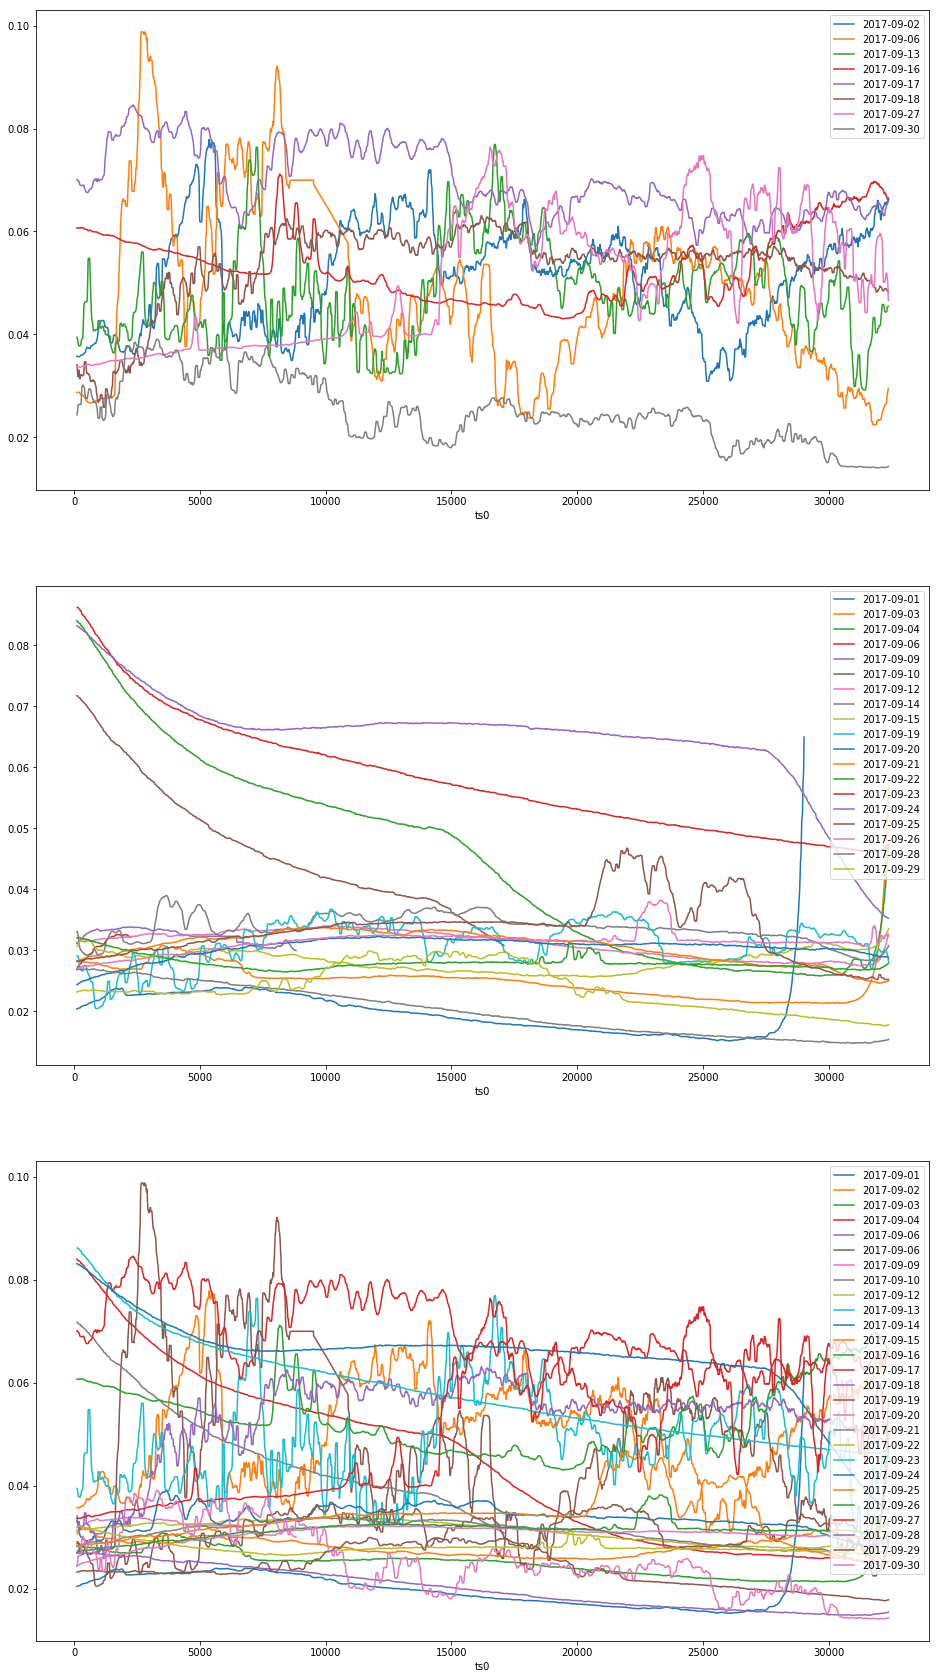

In [106]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 30))
for df in dfs:
    df["dt"] = pd.to_datetime(df["dt"])
    df.sort_values("dt", inplace=True)
    df["ts0"] = (df["dt"] - df["dt"].iloc[0]).dt.total_seconds()
    df.set_index("ts0", inplace=True)
for df in dfs:
    rsm = df["mean"].rolling(50).std().mean()
    if rsm > .0009:
        df["mean"].rolling(12).median().plot(ax=ax1, label=df.iloc[0]["dt"].date())
    else:
        df["mean"].rolling(12).median().plot(ax=ax2, label=df.iloc[0]["dt"].date())

    df["mean"].rolling(12).median().plot(ax=ax3, label=df.iloc[0]["dt"].date())
    print(df.iloc[0]["dt"].date(), ": ", rsm)
[ax.legend() for ax in (ax1, ax2, ax3)]

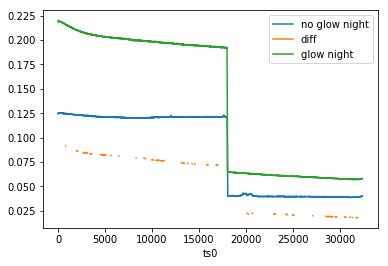

In [97]:
df1 = pd.read_csv("weather_results/2017-09-22.csv0", names=["dt", "mean"], header=None, skiprows=[0])
df1["dt"] = pd.to_datetime(df1["dt"])
df1.sort_values("dt", inplace=True)
df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
df1.set_index("ts0", inplace=True)
df1["mean"].plot(label='no glow night')

df2 = pd.read_csv("weather_results/2017-09-23.csv0", names=["dt", "mean"], header=None, skiprows=[0])
df2["dt"] = pd.to_datetime(df2["dt"])
df2.sort_values("dt", inplace=True)
df2["ts0"] = (df2["dt"] - df2["dt"].iloc[0]).dt.total_seconds()
df2.set_index("ts0", inplace=True)
(df2["mean"] - df1["mean"]).plot(label='diff')
ax = df2["mean"].plot(label="glow night")
ax.legend()

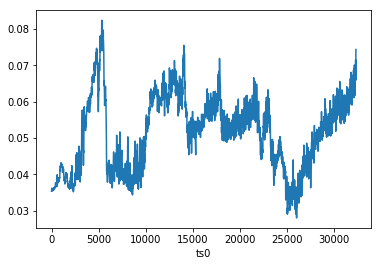

In [99]:
df1 = pd.read_csv("weather_results/2017-09-02.csv", names=["dt", "mean"], header=None, skiprows=[0])
df1["dt"] = pd.to_datetime(df1["dt"])
df1.sort_values("dt", inplace=True)
df1["ts0"] = (df1["dt"] - df1["dt"].iloc[0]).dt.total_seconds()
df1.set_index("ts0", inplace=True)
df1["mean"].plot(label='no glow night')


## pd.__version__